In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
#conda install pydotplus
import pydotplus
#conda install python-graphviz
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
data_set = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
       'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
       'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
       'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}

df = pd.DataFrame(data=data_set)
df.head()

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No
2,Spicy,Hot,Hard,Yes
3,Spicy,Cold,Hard,No
4,Spicy,Hot,Hard,Yes


In [7]:
#Label Encoder Objects

le_taste = LabelEncoder()
le_temperature = LabelEncoder()
le_texture = LabelEncoder()
le_eat = LabelEncoder()

In [9]:
df['Taste_n'] = le_taste.fit_transform(df['Taste'])
df['Temperature_n'] = le_temperature.fit_transform(df['Temperature'])
df['Texture_n'] = le_texture.fit_transform(df['Texture'])
df['Eat_n'] = le_eat.fit_transform(df['Eat'])

In [16]:
inputs = df.drop(['Taste','Temperature','Texture','Eat','Eat_n'], axis = 'columns')
inputs

,Taste_n,Temperature_n,Texture_n
0,0,1,1
1,1,1,1
2,1,1,0
3,1,0,0
4,1,1,0
5,2,0,1
6,0,0,1
7,2,1,1
8,1,0,1
9,0,1,0


In [17]:
target = df['Eat_n']
target

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Eat_n, dtype: int32

In [21]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
dtree = model.fit(inputs,target)

In [24]:
model.score(inputs,target)

1.0

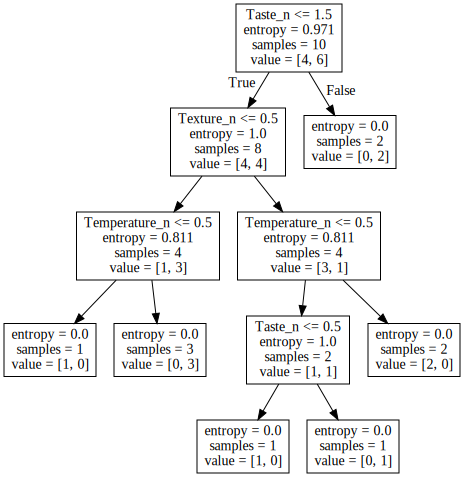

In [31]:
data = tree.export_graphviz(model, out_file=None, feature_names=inputs.columns)
graph = graphviz.Source(data)

graph